# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# # 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import os
import pandas as pd
# 모든 열 출력
pd.set_option('display.max_columns', None) 
import numpy as np

In [4]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'

# warning 방지
import warnings  
warnings.filterwarnings(action = 'ignore')

# Data Load  
* 70사8163_현대신형_중형_공항버스_202008202102

In [5]:
path = '/content/drive/MyDrive/Codestates Aibootcamp/tenergy/data/70사8163_현대신형_중형_공항버스_202008202102/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]

df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i, encoding='cp949')
    df = pd.concat([df,data])
    
df = df.reset_index(drop = True)

In [6]:
print(df.shape)

(8506129, 44)


### 2.1 Data Columns Name

In [7]:
# 데이터의 컬럼이름 확인
df.columns

Index(['DrvState', 'LogType', 'BusType', 'BusState', 'CanState', 'AuxStatus',
       'Year', 'Month', 'Day', 'Hours', 'Minute', 'Sec', 'CoolTemp',
       'FanControl', 'RPM', 'Speed', 'TachoSpeed', 'CanSpeed', 'GpsSpeed',
       'APS', 'Brake', 'ACC', 'Torque', 'FuelRate', 'EcoGear', 'DriveGear',
       'AccGrade', 'Acc2Grade', 'DecGrade', 'CoastingGrade', 'AvgRPMGrade',
       'SpeedGrade', 'SIGrade', 'PreSIGrade', 'ShortAccGrade', 'EcoGrade',
       'DrvNo', 'GpsState', 'Latitude', 'Longitude', 'ItemIndex1',
       'ItemIndex2', 'ItemIndex3', 'ItemIndex4'],
      dtype='object')

### 2.2 Data Unique Value

In [8]:
# 각 특성의 unique 값을 확인
for i in df.columns:
    print(i, '\n', df[i].unique())

DrvState 
 ['B' 'U' 'S' 'D' 'E' 'F']
LogType 
 ['F' 'S']
BusType 
 ['중형']
BusState 
 [1 0 4 3 2]
CanState 
 [0 1]
AuxStatus 
 [0]
Year 
 [2020    1 1970 2021]
Month 
 [ 8  9  1 11 12  2]
Day 
 [31  1  3  2  4  5  6  7 10 11 12 14 15 16 13 17 18 19 20 21 22 23 24 25
 26 27 28 29 30  8  9]
Hours 
 [ 0  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  4  1]
Minute 
 [48 49 50 51 59  0  1  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 52 53
 54 55 56 57 58  2  3  4  5  6  7  8]
Sec 
 [47 48 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7  8  9 10
 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46]
CoolTemp 
 [ 0 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 28 29 30 31 32 33 34 35 25 26 27 89 90 91 24 92 22 23
 20 21 17 18 19 12 13 

### 2.3 Data Null value

In [9]:
# 결측치 확인
df.isnull().sum()

DrvState         0
LogType          0
BusType          0
BusState         0
CanState         0
AuxStatus        0
Year             0
Month            0
Day              0
Hours            0
Minute           0
Sec              0
CoolTemp         0
FanControl       0
RPM              0
Speed            0
TachoSpeed       0
CanSpeed         0
GpsSpeed         0
APS              0
Brake            0
ACC              0
Torque           0
FuelRate         0
EcoGear          0
DriveGear        0
AccGrade         0
Acc2Grade        0
DecGrade         0
CoastingGrade    0
AvgRPMGrade      0
SpeedGrade       0
SIGrade          0
PreSIGrade       0
ShortAccGrade    0
EcoGrade         0
DrvNo            0
GpsState         0
Latitude         0
Longitude        0
ItemIndex1       0
ItemIndex2       0
ItemIndex3       0
ItemIndex4       0
dtype: int64

### 2.4 Data Type

In [10]:
# type 확인
pd.DataFrame(df.dtypes)

,0
DrvState,object
LogType,object
BusType,object
BusState,int64
CanState,int64
AuxStatus,int64
Year,int64
Month,int64
Day,int64
Hours,int64


### 2.5 Data Correlation

In [11]:
# 각 특성의 상관계수 확인
df_corr = df.corr()
df_corr

,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
BusState,1.000000,0.230247,NaN,0.019939,-0.009573,-0.004593,-0.029588,-0.012786,0.001231,0.087755,NaN,0.098435,0.009057,0.009023,0.008625,0.019537,-0.011529,-0.021717,0.000297,0.027285,-0.005328,0.051092,0.052310,0.052397,0.044224,0.074424,0.083763,0.083477,-0.148708,0.039090,-0.094415,-0.153029,-0.087361,-0.070377,0.094442,0.094206,0.092831,0.010631,NaN,NaN,NaN
CanState,0.230247,1.000000,NaN,0.073797,0.000440,-0.009739,0.083615,0.001284,0.000298,0.911448,NaN,0.504584,0.184426,0.184448,0.185022,0.168804,0.098784,0.128904,-0.000007,0.183566,0.156959,0.217697,0.219869,-0.064415,-0.035433,-0.094748,-0.027786,-0.108361,0.214182,-0.024422,0.164334,0.212610,0.154336,0.111503,0.203122,0.203601,0.204416,0.157989,NaN,NaN,NaN
AuxStatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,0.019939,0.073797,NaN,1.000000,0.014263,0.030467,0.045143,0.029970,0.004158,0.075060,NaN,0.037632,0.014993,0.014995,0.015042,0.013185,0.007852,0.009285,0.000316,0.013333,0.012505,0.017895,0.018009,0.089792,0.220777,0.172249,0.406205,0.127154,-0.011319,0.268014,-0.021284,-0.012891,0.195958,0.039474,0.113247,0.081032,0.081072,0.011938,NaN,NaN,NaN
Month,-0.009573,0.000440,NaN,0.014263,1.000000,-0.008390,0.010787,0.000450,0.000236,0.015728,NaN,0.031739,-0.002498,-0.002524,-0.002431,-0.008630,0.017976,-0.002126,0.000002,-0.000029,0.000975,-0.017433,-0.017337,-0.124321,-0.063059,-0.094304,-0.039254,-0.131150,0.014154,-0.103632,0.023850,0.006456,-0.096210,0.020993,-0.036029,-0.036786,-0.036578,0.000141,NaN,NaN,NaN
Day,-0.004593,-0.009739,NaN,0.030467,-0.008390,1.000000,-0.000196,0.001917,0.000039,-0.005477,NaN,-0.003799,0.002828,0.002806,0.002812,0.000454,0.008266,0.000096,-0.000003,0.003161,0.004120,0.003379,0.003274,0.049240,0.020824,0.047823,0.014150,0.012378,-0.013170,0.026089,0.011412,-0.015128,0.019146,-0.011069,-0.010260,-0.011039,-0.011063,0.003935,NaN,NaN,NaN
Hours,-0.029588,0.083615,NaN,0.045143,0.010787,-0.000196,1.000000,-0.024534,-0.000066,0.136345,NaN,0.035859,0.007344,0.007348,0.007305,0.006778,0.013409,0.013570,-0.000091,0.005747,0.005878,0.019801,0.020285,-0.038782,-0.016436,-0.019748,0.050749,-0.029168,0.093852,-0.012139,0.009356,0.083453,0.063113,0.096016,0.022948,0.022167,0.022260,0.003311,NaN,NaN,NaN
Minute,-0.012786,0.001284,NaN,0.029970,0.000450,0.001917,-0.024534,1.000000,0.001544,0.002857,NaN,0.004610,0.004049,0.004034,0.004041,0.003989,0.003633,-0.001152,0.000279,0.003334,0.003905,0.002413,0.002415,0.085803,0.068179,0.114933,0.042744,0.142471,-0.216298,0.061289,-0.190382,-0.206686,-0.125787,0.011964,0.008708,0.006507,0.006672,0.003896,NaN,NaN,NaN
Sec,0.001231,0.000298,NaN,0.004158,0.000236,0.000039,-0.000066,0.001544,1.000000,0.000266,NaN,-0.003713,-0.000719,-0.000719,-0.000642,0.000099,-0.005276,0.005773,-0.006346,-0.004941,-0.005042,0.000164,0.000164,0.001612,0.001799,0.002431,0.002206,0.002583,-0.003371,0.001837,-0.002997,-0.003244,-0.001273,0.000603,0.000770,0.000926,0.000917,-0.005011,NaN,NaN,NaN
CoolTemp,0.087755,0.911448,NaN,0.075060,0.015728,-0.005477,0.136345,0.002857,0.000266,1.000000,NaN,0.475062,0.197263,0.197247,0.198106,0.184119,0.101420,0.148463,-0.011434,0.164093,0.154922,0.221979,0.223436,-0.099888,-0.057521,-0.141462,-0.051804,-0.166792,0.306803,-0.050082,0.239969,0.302932,0.210201,0.145623,0.246658,0.243474,0.244543,0.144910,NaN,NaN,NaN


### 2.6 Describe

In [12]:
# describe로 통계요약 확인
df_des = df.describe()
df_des

,BusState,CanState,AuxStatus,Year,Month,Day,Hours,Minute,Sec,CoolTemp,FanControl,RPM,Speed,TachoSpeed,CanSpeed,GpsSpeed,APS,Brake,ACC,Torque,FuelRate,EcoGear,DriveGear,AccGrade,Acc2Grade,DecGrade,CoastingGrade,AvgRPMGrade,SpeedGrade,SIGrade,PreSIGrade,ShortAccGrade,EcoGrade,DrvNo,GpsState,Latitude,Longitude,ItemIndex1,ItemIndex2,ItemIndex3,ItemIndex4
count,8.506129e+06,8.506129e+06,8506129.0,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8506129.0,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8.506129e+06,8506129.0,8506129.0,8506129.0
mean,1.234608e+00,9.716253e-01,0.0,2.019673e+03,7.322220e+00,1.600259e+01,1.377491e+01,2.941448e+01,2.948486e+01,7.801119e+01,4.0,7.797394e+02,1.585844e+01,1.379144e+01,1.630732e+01,1.463642e+01,1.253501e+01,3.626438e-01,-1.858237e-05,2.265957e+01,5.054185e+00,3.638458e+00,3.656146e+00,8.921344e+00,1.935956e+01,9.225585e+00,1.471955e+01,1.314483e+01,-2.723855e+00,2.921938e+01,-1.417812e+00,-2.128709e+00,8.831546e+01,5.143534e+02,9.752629e-01,3.667856e+01,1.238612e+02,5.067251e+01,0.0,0.0,0.0
std,7.896375e-01,1.660409e-01,0.0,3.639787e+01,4.287584e+00,8.796753e+00,5.477388e+00,1.731725e+01,1.733238e+01,1.462654e+01,0.0,2.640783e+02,1.469438e+01,1.277768e+01,1.506176e+01,1.459842e+01,2.168486e+01,4.807633e-01,4.428688e-01,2.109479e+01,5.502769e+00,2.856135e+00,2.841668e+00,1.812634e+00,1.582682e+00,9.725076e-01,6.541449e-01,1.892652e+00,4.451872e+00,1.978428e+00,1.209915e+00,3.036532e+00,8.170081e+00,2.326892e+02,1.553228e-01,5.683481e+00,1.918715e+01,5.481026e+01,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.237000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,-3.000000e+00,-7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
25%,1.000000e+00,1.000000e+00,0.0,2.020000e+03,2.000000e+00,8.000000e+00,9.000000e+00,1.400000e+01,1.400000e+01,7.900000e+01,4.0,6.470000e+02,0.000000e+00,0.000000e+00,4.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,-1.900000e-01,1.000000e+01,2.000000e+00,0.000000e+00,0.000000e+00,8.300000e+00,1.960000e+01,8.600000e+00,1.490000e+01,1.170000e+01,-1.000000e+01,2.930000e+01,-3.000000e+00,-7.000000e+00,8.000000e+01,3.450000e+02,1.000000e+00,3.755144e+01,1.268051e+02,2.000000e+01,0.0,0.0,0.0
50%,1.000000e+00,1.000000e+00,0.0,2.020000e+03,9.000000e+00,1.600000e+01,1.400000e+01,2.900000e+01,2.900000e+01,8.100000e+01,4.0,6.740000e+02,1.439500e+01,1.251800e+01,1.497300e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,2.250000e+00,4.000000e+00,4.000000e+00,1.000000e+01,2.000000e+01,9.600000e+00,1.500000e+01,1.360000e+01,0.000000e+00,3.000000e+01,-1.100000e+00,0.000000e+00,9.000000e+01,4.700000e+02,1.000000e+00,3.755909e+01,1.268277e+02,2.300000e+01,0.0,0.0,0.0
75%,1.000000e+00,1.000000e+00,0.0,2.021000e+03,1.100000e+01,2.300000e+01,1.800000e+01,4.400000e+01,4.500000e+01,8.300000e+01,4.0,9.370000e+02,2.742000e+01,2.384300e+01,2.827700e+01,2.600000e+01,2.100000e+01,1.000000e+00,1.900000e-01,4.000000e+01,8.100000e+00,7.000000e+00,7.000000e+00,1.000000e+01,2.000000e+01,1.000000e+01,1.500000e+01,1.500000e+01,0.000000e+00,3.000000e+01,-2.000000e-01,0.000000e+00,9.600000e+01,4.700000e+02,1.000000e+00,3.756277e+01,1.268541e+02,8.100000e+01,0.0,0.0,0.0
max,4.000000e+00,1.000000e+00,0.0,2.021000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01,9.200000e+01,4.0,2.500000e+03,6.306500e+01,5

# Modeling

In [13]:
# modeling library import
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [14]:
# modeling 전 X, y split & object형인 'DrvState', 'LogType', 'BusType' 을 드랍
df = df.drop(['DrvState', 'LogType', 'BusType'], axis=1)
y = df['FuelRate']
X = df.drop('FuelRate', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### 3.1 Linear Regression

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

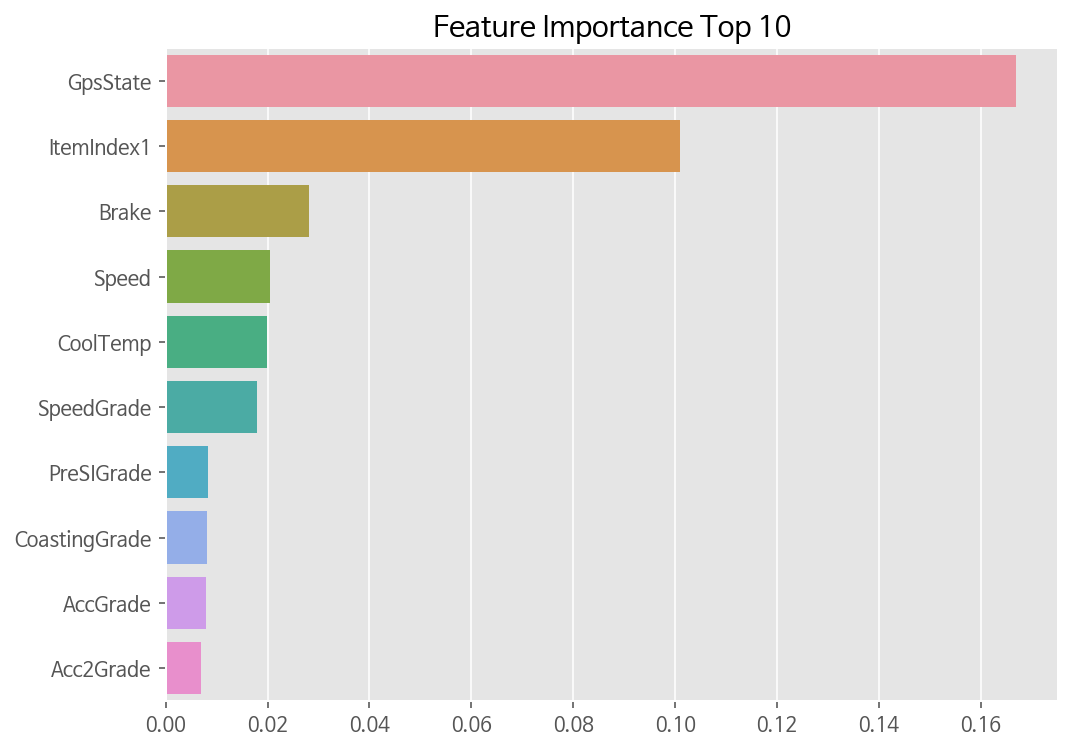

In [25]:
# coefficient
lr_importance = lr.coef_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
lr_series = pd.Series(lr_importance, index = X_train.columns)
lr_top10 = lr_series.sort_values(ascending=False)[:10]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 10')
sns.barplot(x=lr_top10, y=lr_top10.index)
plt.show();

### 3.2 RandomForest

In [ ]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# 배열형태로 반환
rf_importance_values = rf.feature_importances_
rf_importance_values

array([9.46143022e-05, 5.19434251e-10, 0.00000000e+00, 1.82204667e-05,
       1.11363502e-04, 2.39627322e-04, 1.92879656e-04, 2.19263139e-04,
       1.50720632e-04, 8.60986141e-04, 0.00000000e+00, 1.47636740e-04,
       6.57940922e-05, 7.25374998e-05, 4.61208474e-04, 7.32570016e-05,
       1.96082330e-04, 2.02393707e-05, 5.87109206e-05, 1.00457357e-04,
       2.14539216e-05, 3.74196481e-05, 1.98195039e-06, 1.31529400e-06,
       4.52100832e-06, 8.70868617e-07, 1.14021849e-05, 1.42368610e-04,
       1.83960138e-06, 5.90092137e-06, 1.54175832e-04, 7.83591238e-06,
       6.47920262e-04, 6.37247719e-06, 2.45620626e-04, 2.02480511e-04,
       9.95422921e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

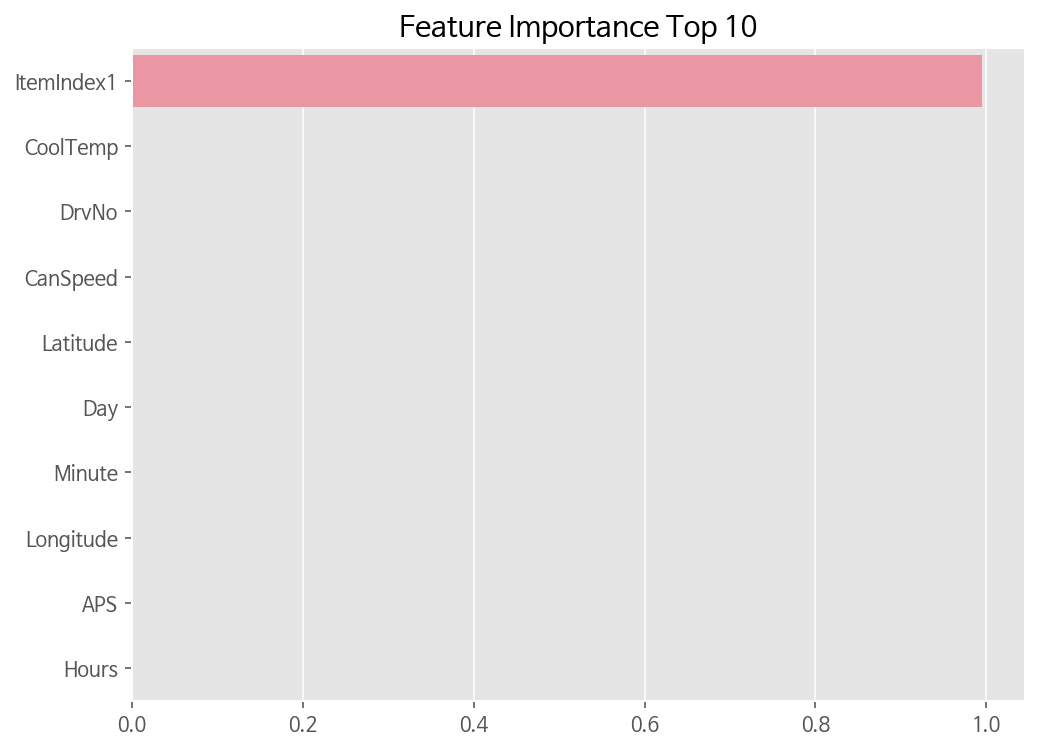

In [ ]:
# 정렬과 시각화를 쉽게 하기 위해 series 전환
rf_series = pd.Series(rf_importance_values, index = X_train.columns)
rf_top10 = rf_series.sort_values(ascending=False)[:10]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 10')
sns.barplot(x=rf_top10, y=rf_top10.index)
plt.show();

### 3.3 Xgboost


In [ ]:
xgb = XGBRegressor(n_jobs=-1)
xgb.fit(X_train, y_train)

[09:43:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:43:36] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# 배열형태로 반환
xgb_importance_values = xgb.feature_importances_
xgb_importance_values

array([1.9010013e-03, 0.0000000e+00, 0.0000000e+00, 1.6085461e-03,
       0.0000000e+00, 2.1629168e-04, 2.9987388e-04, 0.0000000e+00,
       6.6605122e-07, 5.3289831e-03, 0.0000000e+00, 6.8684304e-03,
       8.5218454e-04, 1.5957576e-03, 1.7249899e-03, 7.0676928e-05,
       1.3393613e-02, 0.0000000e+00, 6.7946763e-05, 7.1893390e-03,
       6.8220403e-04, 1.0981560e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.6925391e-04, 3.0960264e-03,
       1.7916612e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       7.2409622e-03, 2.2765537e-04, 2.5381532e-04, 1.0581133e-03,
       9.4477636e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
      dtype=float32)

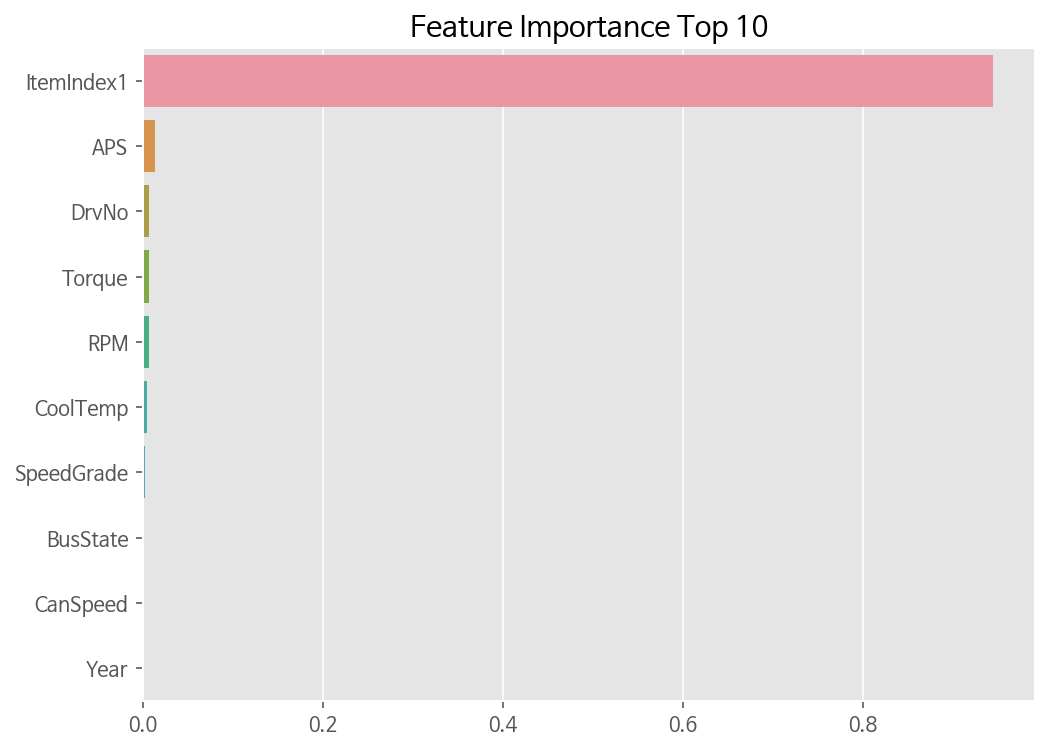

In [ ]:
# 정렬과 시각화를 쉽게 하기 위해 series 전환
xgb_series = pd.Series(xgb_importance_values, index = X_train.columns)
xgb_top10 = xgb_series.sort_values(ascending=False)[:10]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 10')
sns.barplot(x=xgb_top10, y=xgb_top10.index)
plt.show();